## SoftMax Regression

Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes. In logistic regression we assumed that the labels were binary: y(i)∈{0,1}. We used such a classifier to distinguish between two kinds of hand-written digits. Softmax regression allows us to handle y(i)∈{1,…,K} where K is the number of classes.

Recall that in logistic regression, we had a training set {(x(1),y(1)),…,(x(m),y(m))} of m labeled examples, where the input features are x(i)∈Rn. With logistic regression, we were in the binary classification setting, so the labels were y(i)∈{0,1}. Our hypothesis took the form:

$$
\begin{array}{c}{h_{\theta}(x)=\frac{1}{1+e^{-\theta T_{x}}}} \end{array}
$$

and the model parameters θ were trained to minimize the cost function

$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{i} \log \left(h_{\theta}\left(x^{i}\right)\right)+\left(1-y^{i}\right) \log \left(1-h_{\theta}\left(x^{i}\right)\right)\right]
$$

In the softmax regression setting, we are interested in multi-class classification (as opposed to only binary classification), and so the label y can take on K different values, rather than only two. Thus, in our training set {(x(1),y(1)),…,(x(m),y(m))}, we now have that y(i)∈{1,2,…,K}. (Note that our convention will be to index the classes starting from 1, rather than from 0.) For example, in the MNIST digit recognition task, we would have K=10 different classes.

Given a test input x, we want our hypothesis to estimate the probability that P(y=k|x) for each value of k=1,…,K. I.e., we want to estimate the probability of the class label taking on each of the K different possible values. Thus, our hypothesis will output a K-dimensional vector (whose elements sum to 1) giving us our K estimated probabilities. Concretely, our hypothesis hθ(x) takes the form:


$$h_{\theta}(x)=\left[ \begin{array}{c}{P(y=1 | x ; \theta)} \\ {P(y=2 | x ; \theta)} \\ {\vdots} \\ {P(y=K | x ; \theta)}\end{array}\right]=\frac{1}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x\right)} \left[ \begin{array}{c}{\exp \left(\theta^{(1) \top} x\right)} \\ {\exp \left(\theta^{(2) \top} x\right)} \\ {\vdots} \\ {\exp \left(\theta^{(K) \top} x\right)}\end{array}\right]$$

Here $\theta^{(1)}, \theta^{(2)}, \ldots, \theta^{(K)} \in \mathfrak{R}^{n}$ are the parameters of our model. Notice that the term $\frac{1}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x\right)}$ normalizes the distribution, so that it sums to one.

# Cost Function

We now describe the cost function that we’ll use for softmax regression.

Our cost function will be
$$J(\theta)=-\left[\sum_{i=1}^{m} \sum_{k=1}^{K} 1\left\{y^{(i)}=k\right\} \log \frac{\exp \left(\theta^{(k) \top} x^{(i)}\right)}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x^{(i)}\right)}\right]$$

Notice that this generalizes the logistic regression cost function, which could also have been written:

$$\begin{aligned} J(\theta) &=-\left[\sum_{i=1}^{m}\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)+y^{(i)} \log h_{\theta}\left(x^{(i)}\right)\right] \\ &=-\left[\sum_{i=1}^{m} \sum_{k=0}^{1} 1\left\{y^{(i)}=k\right\} \log P\left(y^{(i)}=k | x^{(i)} ; \theta\right)\right] \end{aligned}$$

The softmax cost function is similar, except that we now sum over the K different possible values of the class label. Note also that in softmax regression, we have that

$$P\left(y^{(i)}=k | x^{(i)} ; \theta\right)=\frac{\exp \left(\theta^{(k) \top} x^{(i)}\right)}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x^{(i)}\right)}$$


We cannot solve for the minimum of J(θ) analytically, and thus as usual we’ll resort to an iterative optimization algorithm. Taking derivatives, one can show that the gradient is:

$$\nabla_{\theta^{(k)}} J(\theta)=-\sum_{i=1}^{m}\left[x^{(i)}\left(1\left\{y^{(i)}=k\right\}-P\left(y^{(i)}=k | x^{(i)} ; \theta\right)\right)\right]$$

Recall the meaning of the ”$\nabla_{\theta^{(k)}}$” notation. In particular, $\nabla_{\theta^{(k)}} J(\theta)$ is itself a vector, so that its j-th element is $\frac{\partial J(\theta)}{\partial \theta_{l k}}$ the partial derivative of $J(\theta)$ with respect to the j-th element of $\theta(k)$.

Armed with this formula for the derivative, one can then plug it into a standard optimization package and have it minimize $J(\theta)$.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('glass.csv')
N_labels = len(set(raw_data['Type']))
raw_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


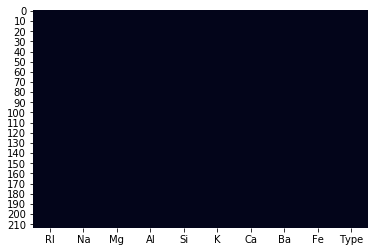

In [3]:
#Check null entries
sns.heatmap(raw_data.isnull(),cbar=False)
# no entry is null

# Data visualization

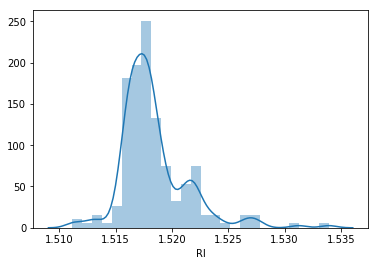

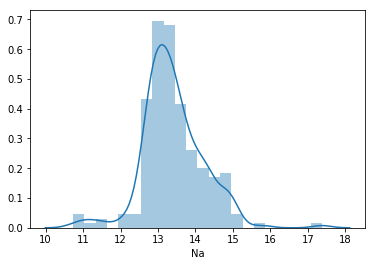

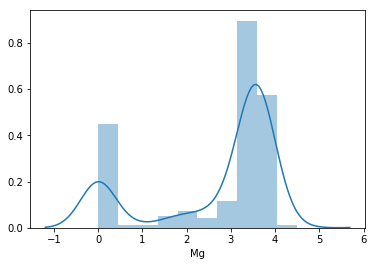

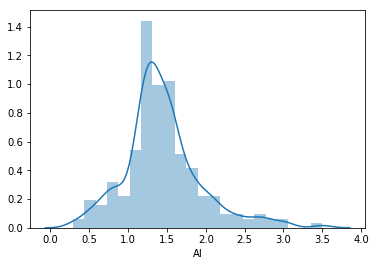

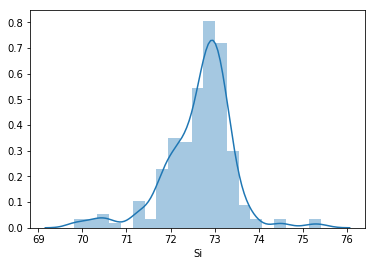

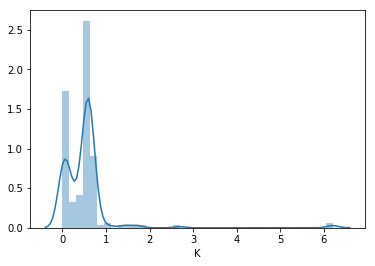

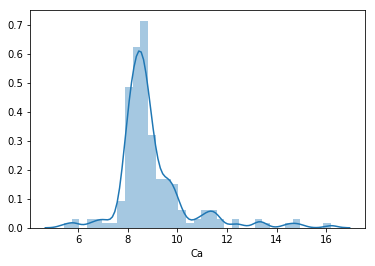

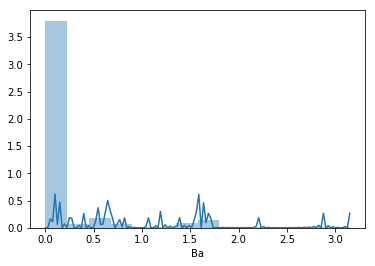

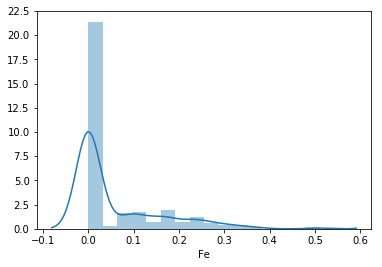

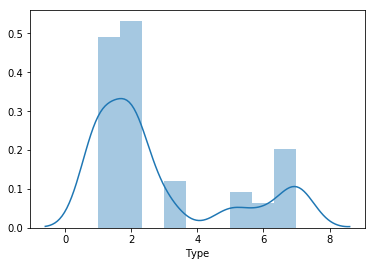

In [4]:
for feat in raw_data:
    sns.distplot(raw_data[feat])
    plt.show()

## These graphs clearly shows that our data in not Normally distributed it means due to some features our classification algorithm may be disturb

## Lets find the correlation between all features

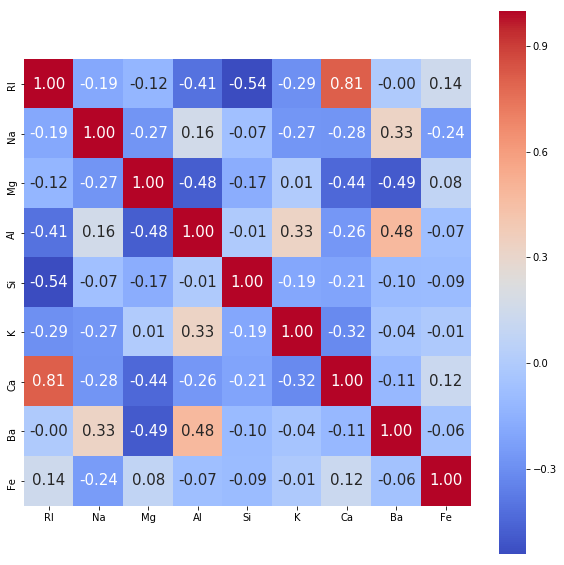

In [5]:
features = raw_data.columns[:-1].tolist()
corr = raw_data[features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, cmap= 'coolwarm')
plt.show()

## Ca and RI are positivity correlated i.e both are dependent Ba and Al also
## Therefore 
## 1. Logistic regression may not give us perfect results because according to there assumptions all independent variables are independent to each other.
## 2. Maximum liklihood not give us good results in small data sets

## But we try to compute classification on this data without any further changes

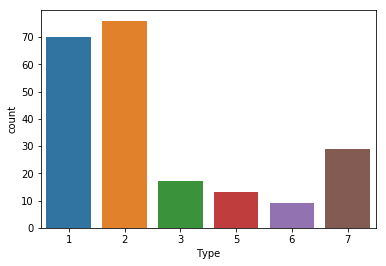

In [6]:
sns.countplot(raw_data['Type'])
plt.show()

## We have 6 labels = [1,2,3,5,6,7] out of which 1 and 2 label contains more than 70 % of data

# Data Wrangling


In [7]:
# data seperation
z = list(map(lambda i:raw_data[raw_data['Type']==i].iloc[:int(0.7*raw_data[raw_data['Type']==i].shape[0]),:],
             set(raw_data['Type'])))
training_data = pd.DataFrame()
training_data = training_data.append(z)
training_data_labels = np.array(training_data['Type'])
training_data.drop('Type',inplace=True,axis=1)
training_data = np.array(training_data)
training_data = (training_data)/np.max(training_data)  # normalized data

x = list(map(lambda i:raw_data[raw_data['Type']==i].iloc[:int(0.3*raw_data[raw_data['Type']==i].shape[0]),:],set(raw_data['Type'])))
testing_data = pd.DataFrame()
testing_data = testing_data.append(x)
testing_data_labels = np.array(testing_data['Type'])
testing_data.drop('Type',inplace=True,axis=1)
testing_data = np.array(testing_data)
testing_data = (testing_data)/np.max(testing_data)  # normalized data

pd.DataFrame(training_data)

,0,1,2,3,4,5,6,7,8
0,0.020232,0.181431,0.059723,0.014632,0.954775,0.000798,0.116387,0.000000,0.000000
1,0.020186,0.184757,0.047885,0.018090,0.967412,0.006385,0.104150,0.000000,0.000000
2,0.020167,0.179968,0.047220,0.020484,0.970870,0.005188,0.103485,0.000000,0.000000
3,0.020187,0.175712,0.049082,0.017159,0.965815,0.007582,0.109338,0.000000,0.000000
4,0.020184,0.176510,0.048151,0.016494,0.972067,0.007316,0.107342,0.000000,0.000000
5,0.020164,0.170125,0.048018,0.021548,0.970604,0.008513,0.107342,0.000000,0.003458
6,0.020184,0.176909,0.047885,0.015164,0.972200,0.007715,0.108673,0.000000,0.000000
7,0.020186,0.174914,0.048018,0.013966,0.974195,0.007582,0.109604,0.000000,0.000000
8,0.020207,0.186752,0.047619,0.018223,0.958766,0.007449,0.110402,0.000000,0.000000
9,0.020186,0.172918,0.047885,0.018090,0.970870,0.007582,0.111732,0.000000,0.001463


In [8]:
pd.DataFrame(testing_data)

,0,1,2,3,4,5,6,7,8
0,0.020705,0.185679,0.061122,0.014974,0.977130,0.000817,0.119112,0.000000,0.000000
1,0.020659,0.189082,0.049006,0.018513,0.990063,0.006534,0.106589,0.000000,0.000000
2,0.020640,0.184182,0.048326,0.020964,0.993602,0.005309,0.105908,0.000000,0.000000
3,0.020660,0.179826,0.050231,0.017561,0.988429,0.007759,0.111898,0.000000,0.000000
4,0.020656,0.180643,0.049279,0.016880,0.994827,0.007487,0.109856,0.000000,0.000000
5,0.020637,0.174108,0.049142,0.022053,0.993330,0.008712,0.109856,0.000000,0.003539
6,0.020657,0.181051,0.049006,0.015519,0.994963,0.007895,0.111217,0.000000,0.000000
7,0.020658,0.179009,0.049142,0.014293,0.997005,0.007759,0.112170,0.000000,0.000000
8,0.020680,0.191124,0.048734,0.018650,0.981214,0.007623,0.112987,0.000000,0.000000
9,0.020658,0.176967,0.049006,0.018513,0.993602,0.007759,0.114348,0.000000,0.001497


## One Hot Encoding
A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [15]:
def oneHotEncoding(label):
    s = pd.Series(label)
    return np.array(pd.get_dummies(s))
training_label_hot_encoded = oneHotEncoding(training_data_labels)
testing_label_hot_encoded = oneHotEncoding(testing_data_labels)
training_label_hot_encoded

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
 

In [11]:
def softmax(theta0 , theta , data):
    exp = np.exp(theta0 + np.dot(data , theta))
    sum_denominator = np.sum((exp),axis=1)
    s = list(map(lambda i : exp[:,i] / sum_denominator , np.arange(N_labels)))
    return np.array(s).T

alpha = 0.001
epsilon = 0.00001
initial_theta0 = np.random.randn(1,N_labels) 
initial_theta = np.random.randn(training_data.shape[1] , N_labels)
i = 0
fc = []
itera = []
while(True):
    i+=1
 
    del_theta0 = (np.sum((softmax(initial_theta0 , initial_theta , training_data) - training_label_hot_encoded),axis = 0))/training_data.shape[0]
    del_theta = (np.matmul(training_data.T,(softmax(initial_theta0,initial_theta,training_data)-training_label_hot_encoded)))/training_data.shape[0]

    final_theta0 = initial_theta0 - alpha * del_theta0
    final_theta = initial_theta - alpha * del_theta

    initial_cost = (-np.sum(
        np.matmul(np.log(softmax(initial_theta0 , initial_theta , training_data)).T , training_label_hot_encoded )
        ))/training_data.shape[0]

    final_cost = (-np.sum(
        np.matmul(np.log(softmax(final_theta0 , final_theta , training_data)).T , training_label_hot_encoded )
        ))/training_data.shape[0]
    
    if (abs(final_cost - initial_cost)) < epsilon:
        break
    print('at {} iteration ANL : {}'.format(i,initial_cost))
    initial_theta0 = final_theta0
    initial_theta  = final_theta
    itera.append(i)
    fc.append(final_cost)

at 1 iteration ANL : 14.411852443595052
at 2 iteration ANL : 14.410766473623337
at 3 iteration ANL : 14.409681249490804
at 4 iteration ANL : 14.408596770776676
at 5 iteration ANL : 14.407513037060282
at 6 iteration ANL : 14.406430047921079
at 7 iteration ANL : 14.40534780293865
at 8 iteration ANL : 14.404266301692676
at 9 iteration ANL : 14.403185543762973
at 10 iteration ANL : 14.402105528729479
at 11 iteration ANL : 14.401026256172234
at 12 iteration ANL : 14.399947725671398
at 13 iteration ANL : 14.398869936807255
at 14 iteration ANL : 14.3977928891602
at 15 iteration ANL : 14.396716582310745
at 16 iteration ANL : 14.395641015839518
at 17 iteration ANL : 14.39456618932725
at 18 iteration ANL : 14.393492102354802
at 19 iteration ANL : 14.392418754503144
at 20 iteration ANL : 14.391346145353344
at 21 iteration ANL : 14.390274274486602
at 22 iteration ANL : 14.389203141484224
at 23 iteration ANL : 14.388132745927624
at 24 iteration ANL : 14.387063087398326
at 25 iteration ANL : 14.3859

at 268 iteration ANL : 14.147084630070397
at 269 iteration ANL : 14.146183156330023
at 270 iteration ANL : 14.145282319267356
at 271 iteration ANL : 14.144382118483117
at 272 iteration ANL : 14.143482553578098
at 273 iteration ANL : 14.14258362415316
at 274 iteration ANL : 14.141685329809222
at 275 iteration ANL : 14.140787670147267
at 276 iteration ANL : 14.139890644768347
at 277 iteration ANL : 14.138994253273562
at 278 iteration ANL : 14.1380984952641
at 279 iteration ANL : 14.13720337034119
at 280 iteration ANL : 14.136308878106139
at 281 iteration ANL : 14.135415018160307
at 282 iteration ANL : 14.134521790105131
at 283 iteration ANL : 14.1336291935421
at 284 iteration ANL : 14.132737228072772
at 285 iteration ANL : 14.131845893298765
at 286 iteration ANL : 14.130955188821762
at 287 iteration ANL : 14.13006511424352
at 288 iteration ANL : 14.129175669165845
at 289 iteration ANL : 14.12828685319061
at 290 iteration ANL : 14.127398665919765
at 291 iteration ANL : 14.126511106955306


at 518 iteration ANL : 13.940515972855977
at 519 iteration ANL : 13.939761414256555
at 520 iteration ANL : 13.939007394675523
at 521 iteration ANL : 13.938253913732177
at 522 iteration ANL : 13.937500971045893
at 523 iteration ANL : 13.936748566236158
at 524 iteration ANL : 13.93599669892253
at 525 iteration ANL : 13.935245368724678
at 526 iteration ANL : 13.934494575262356
at 527 iteration ANL : 13.933744318155407
at 528 iteration ANL : 13.93299459702377
at 529 iteration ANL : 13.93224541148748
at 530 iteration ANL : 13.931496761166665
at 531 iteration ANL : 13.930748645681547
at 532 iteration ANL : 13.930001064652439
at 533 iteration ANL : 13.929254017699746
at 534 iteration ANL : 13.92850750444397
at 535 iteration ANL : 13.92776152450572
at 536 iteration ANL : 13.92701607750567
at 537 iteration ANL : 13.92627116306461
at 538 iteration ANL : 13.925526780803432
at 539 iteration ANL : 13.924782930343103
at 540 iteration ANL : 13.924039611304696
at 541 iteration ANL : 13.923296823309371

at 769 iteration ANL : 13.767058395078251
at 770 iteration ANL : 13.766427455151055
at 771 iteration ANL : 13.76579696205993
at 772 iteration ANL : 13.76516691545317
at 773 iteration ANL : 13.764537314979211
at 774 iteration ANL : 13.763908160286627
at 775 iteration ANL : 13.763279451024124
at 776 iteration ANL : 13.762651186840547
at 777 iteration ANL : 13.762023367384899
at 778 iteration ANL : 13.7613959923063
at 779 iteration ANL : 13.76076906125403
at 780 iteration ANL : 13.760142573877488
at 781 iteration ANL : 13.759516529826232
at 782 iteration ANL : 13.758890928749958
at 783 iteration ANL : 13.758265770298495
at 784 iteration ANL : 13.757641054121816
at 785 iteration ANL : 13.757016779870039
at 786 iteration ANL : 13.756392947193413
at 787 iteration ANL : 13.755769555742345
at 788 iteration ANL : 13.755146605167374
at 789 iteration ANL : 13.754524095119177
at 790 iteration ANL : 13.75390202524858
at 791 iteration ANL : 13.753280395206543
at 792 iteration ANL : 13.75265920464419

at 1071 iteration ANL : 13.595275730027954
at 1072 iteration ANL : 13.594764436315726
at 1073 iteration ANL : 13.594253490261297
at 1074 iteration ANL : 13.59374289156176
at 1075 iteration ANL : 13.593232639914417
at 1076 iteration ANL : 13.592722735016725
at 1077 iteration ANL : 13.592213176566334
at 1078 iteration ANL : 13.591703964261072
at 1079 iteration ANL : 13.591195097798941
at 1080 iteration ANL : 13.590686576878136
at 1081 iteration ANL : 13.590178401197017
at 1082 iteration ANL : 13.589670570454127
at 1083 iteration ANL : 13.589163084348202
at 1084 iteration ANL : 13.588655942578143
at 1085 iteration ANL : 13.588149144843042
at 1086 iteration ANL : 13.58764269084216
at 1087 iteration ANL : 13.587136580274949
at 1088 iteration ANL : 13.586630812841044
at 1089 iteration ANL : 13.586125388240246
at 1090 iteration ANL : 13.585620306172547
at 1091 iteration ANL : 13.585115566338123
at 1092 iteration ANL : 13.584611168437327
at 1093 iteration ANL : 13.584107112170683
at 1094 itera

at 1326 iteration ANL : 13.475358985679684
at 1327 iteration ANL : 13.474927037369861
at 1328 iteration ANL : 13.474495365464874
at 1329 iteration ANL : 13.474063969709396
at 1330 iteration ANL : 13.473632849848293
at 1331 iteration ANL : 13.473202005626618
at 1332 iteration ANL : 13.47277143678961
at 1333 iteration ANL : 13.472341143082707
at 1334 iteration ANL : 13.471911124251532
at 1335 iteration ANL : 13.471481380041892
at 1336 iteration ANL : 13.471051910199794
at 1337 iteration ANL : 13.47062271447143
at 1338 iteration ANL : 13.470193792603187
at 1339 iteration ANL : 13.469765144341633
at 1340 iteration ANL : 13.469336769433529
at 1341 iteration ANL : 13.468908667625834
at 1342 iteration ANL : 13.468480838665686
at 1343 iteration ANL : 13.46805328230042
at 1344 iteration ANL : 13.467625998277562
at 1345 iteration ANL : 13.467198986344814
at 1346 iteration ANL : 13.466772246250084
at 1347 iteration ANL : 13.466345777741472
at 1348 iteration ANL : 13.465919580567247
at 1349 iterat

at 1581 iteration ANL : 13.373498791159175
at 1582 iteration ANL : 13.373129573770807
at 1583 iteration ANL : 13.37276057378432
at 1584 iteration ANL : 13.372391790992095
at 1585 iteration ANL : 13.372023225186705
at 1586 iteration ANL : 13.371654876160907
at 1587 iteration ANL : 13.371286743707628
at 1588 iteration ANL : 13.370918827619988
at 1589 iteration ANL : 13.370551127691282
at 1590 iteration ANL : 13.370183643714988
at 1591 iteration ANL : 13.369816375484769
at 1592 iteration ANL : 13.369449322794463
at 1593 iteration ANL : 13.369082485438087
at 1594 iteration ANL : 13.36871586320985
at 1595 iteration ANL : 13.368349455904134
at 1596 iteration ANL : 13.367983263315509
at 1597 iteration ANL : 13.367617285238712
at 1598 iteration ANL : 13.367251521468674
at 1599 iteration ANL : 13.366885971800503
at 1600 iteration ANL : 13.366520636029488
at 1601 iteration ANL : 13.366155513951098
at 1602 iteration ANL : 13.365790605360978
at 1603 iteration ANL : 13.365425910054963
at 1604 itera

at 1832 iteration ANL : 13.287134358289281
at 1833 iteration ANL : 13.286813656955616
at 1834 iteration ANL : 13.286493126429361
at 1835 iteration ANL : 13.2861727665462
at 1836 iteration ANL : 13.285852577141972
at 1837 iteration ANL : 13.28553255805268
at 1838 iteration ANL : 13.285212709114488
at 1839 iteration ANL : 13.284893030163726
at 1840 iteration ANL : 13.284573521036878
at 1841 iteration ANL : 13.284254181570596
at 1842 iteration ANL : 13.28393501160169
at 1843 iteration ANL : 13.283616010967133
at 1844 iteration ANL : 13.283297179504055
at 1845 iteration ANL : 13.282978517049756
at 1846 iteration ANL : 13.282660023441684
at 1847 iteration ANL : 13.282341698517461
at 1848 iteration ANL : 13.282023542114857
at 1849 iteration ANL : 13.281705554071817
at 1850 iteration ANL : 13.28138773422643
at 1851 iteration ANL : 13.281070082416955
at 1852 iteration ANL : 13.28075259848182
at 1853 iteration ANL : 13.280435282259594
at 1854 iteration ANL : 13.280118133589017
at 1855 iteration

at 2140 iteration ANL : 13.195698719768648
at 2141 iteration ANL : 13.195423603117018
at 2142 iteration ANL : 13.195148613841496
at 2143 iteration ANL : 13.194873751822932
at 2144 iteration ANL : 13.194599016942302
at 2145 iteration ANL : 13.194324409080712
at 2146 iteration ANL : 13.19404992811939
at 2147 iteration ANL : 13.193775573939712
at 2148 iteration ANL : 13.193501346423176
at 2149 iteration ANL : 13.193227245451405
at 2150 iteration ANL : 13.192953270906157
at 2151 iteration ANL : 13.192679422669329
at 2152 iteration ANL : 13.192405700622931
at 2153 iteration ANL : 13.192132104649112
at 2154 iteration ANL : 13.191858634630144
at 2155 iteration ANL : 13.19158529044845
at 2156 iteration ANL : 13.19131207198655
at 2157 iteration ANL : 13.191038979127121
at 2158 iteration ANL : 13.190766011752956
at 2159 iteration ANL : 13.190493169746977
at 2160 iteration ANL : 13.190220452992241
at 2161 iteration ANL : 13.189947861371929
at 2162 iteration ANL : 13.189675394769353
at 2163 iterat

at 2465 iteration ANL : 13.112373359932093
at 2466 iteration ANL : 13.112134061238757
at 2467 iteration ANL : 13.111894857498404
at 2468 iteration ANL : 13.111655748628998
at 2469 iteration ANL : 13.111416734548598
at 2470 iteration ANL : 13.111177815175363
at 2471 iteration ANL : 13.110938990427568
at 2472 iteration ANL : 13.110700260223547
at 2473 iteration ANL : 13.11046162448177
at 2474 iteration ANL : 13.11022308312078
at 2475 iteration ANL : 13.109984636059238
at 2476 iteration ANL : 13.109746283215879
at 2477 iteration ANL : 13.109508024509552
at 2478 iteration ANL : 13.109269859859191
at 2479 iteration ANL : 13.109031789183847
at 2480 iteration ANL : 13.108793812402649
at 2481 iteration ANL : 13.108555929434823
at 2482 iteration ANL : 13.108318140199708
at 2483 iteration ANL : 13.108080444616728
at 2484 iteration ANL : 13.107842842605402
at 2485 iteration ANL : 13.10760533408535
at 2486 iteration ANL : 13.10736791897629
at 2487 iteration ANL : 13.10713059719803
at 2488 iteratio

at 2663 iteration ANL : 13.066745423471243
at 2664 iteration ANL : 13.06652344469449
at 2665 iteration ANL : 13.066301546422139
at 2666 iteration ANL : 13.066079728589786
at 2667 iteration ANL : 13.065857991133093
at 2668 iteration ANL : 13.065636333987817
at 2669 iteration ANL : 13.065414757089787
at 2670 iteration ANL : 13.065193260374915
at 2671 iteration ANL : 13.064971843779194
at 2672 iteration ANL : 13.064750507238692
at 2673 iteration ANL : 13.06452925068956
at 2674 iteration ANL : 13.064308074068032
at 2675 iteration ANL : 13.064086977310414
at 2676 iteration ANL : 13.063865960353096
at 2677 iteration ANL : 13.063645023132546
at 2678 iteration ANL : 13.063424165585314
at 2679 iteration ANL : 13.063203387648022
at 2680 iteration ANL : 13.062982689257385
at 2681 iteration ANL : 13.06276207035018
at 2682 iteration ANL : 13.062541530863278
at 2683 iteration ANL : 13.06232107073362
at 2684 iteration ANL : 13.062100689898227
at 2685 iteration ANL : 13.0618803882942
at 2686 iteration

at 2916 iteration ANL : 13.012992018099027
at 2917 iteration ANL : 13.012788554090822
at 2918 iteration ANL : 13.012585156633463
at 2919 iteration ANL : 13.012381825680306
at 2920 iteration ANL : 13.012178561184763
at 2921 iteration ANL : 13.0119753631003
at 2922 iteration ANL : 13.011772231380457
at 2923 iteration ANL : 13.011569165978822
at 2924 iteration ANL : 13.011366166849053
at 2925 iteration ANL : 13.011163233944854
at 2926 iteration ANL : 13.010960367220008
at 2927 iteration ANL : 13.010757566628348
at 2928 iteration ANL : 13.010554832123763
at 2929 iteration ANL : 13.010352163660212
at 2930 iteration ANL : 13.010149561191707
at 2931 iteration ANL : 13.009947024672323
at 2932 iteration ANL : 13.009744554056192
at 2933 iteration ANL : 13.009542149297513
at 2934 iteration ANL : 13.009339810350534
at 2935 iteration ANL : 13.009137537169568
at 2936 iteration ANL : 13.008935329708997
at 2937 iteration ANL : 13.008733187923243
at 2938 iteration ANL : 13.008531111766803
at 2939 itera

at 3169 iteration ANL : 12.963522270776144
at 3170 iteration ANL : 12.963334307781764
at 3171 iteration ANL : 12.963146401294416
at 3172 iteration ANL : 12.96295855128075
at 3173 iteration ANL : 12.962770757707437
at 3174 iteration ANL : 12.962583020541206
at 3175 iteration ANL : 12.96239533974883
at 3176 iteration ANL : 12.962207715297128
at 3177 iteration ANL : 12.962020147152955
at 3178 iteration ANL : 12.96183263528322
at 3179 iteration ANL : 12.961645179654871
at 3180 iteration ANL : 12.961457780234904
at 3181 iteration ANL : 12.961270436990358
at 3182 iteration ANL : 12.96108314988831
at 3183 iteration ANL : 12.960895918895895
at 3184 iteration ANL : 12.96070874398028
at 3185 iteration ANL : 12.960521625108683
at 3186 iteration ANL : 12.960334562248367
at 3187 iteration ANL : 12.960147555366632
at 3188 iteration ANL : 12.959960604430826
at 3189 iteration ANL : 12.95977370940834
at 3190 iteration ANL : 12.95958687026662
at 3191 iteration ANL : 12.959400086973133
at 3192 iteration 

at 3435 iteration ANL : 12.915420808876872
at 3436 iteration ANL : 12.915246829281367
at 3437 iteration ANL : 12.915072898738227
at 3438 iteration ANL : 12.914899017224231
at 3439 iteration ANL : 12.91472518471619
at 3440 iteration ANL : 12.914551401190938
at 3441 iteration ANL : 12.914377666625354
at 3442 iteration ANL : 12.914203980996335
at 3443 iteration ANL : 12.914030344280821
at 3444 iteration ANL : 12.913856756455772
at 3445 iteration ANL : 12.913683217498194
at 3446 iteration ANL : 12.91350972738511
at 3447 iteration ANL : 12.91333628609359
at 3448 iteration ANL : 12.913162893600719
at 3449 iteration ANL : 12.912989549883628
at 3450 iteration ANL : 12.912816254919466
at 3451 iteration ANL : 12.912643008685428
at 3452 iteration ANL : 12.912469811158722
at 3453 iteration ANL : 12.912296662316615
at 3454 iteration ANL : 12.912123562136372
at 3455 iteration ANL : 12.911950510595313
at 3456 iteration ANL : 12.91177750767078
at 3457 iteration ANL : 12.91160455334015
at 3458 iteratio

at 3671 iteration ANL : 12.875675395370555
at 3672 iteration ANL : 12.875512412041699
at 3673 iteration ANL : 12.875349473082691
at 3674 iteration ANL : 12.875186578476752
at 3675 iteration ANL : 12.875023728207124
at 3676 iteration ANL : 12.874860922257078
at 3677 iteration ANL : 12.874698160609908
at 3678 iteration ANL : 12.874535443248918
at 3679 iteration ANL : 12.874372770157454
at 3680 iteration ANL : 12.874210141318871
at 3681 iteration ANL : 12.874047556716556
at 3682 iteration ANL : 12.873885016333917
at 3683 iteration ANL : 12.873722520154374
at 3684 iteration ANL : 12.87356006816138
at 3685 iteration ANL : 12.873397660338416
at 3686 iteration ANL : 12.873235296668973
at 3687 iteration ANL : 12.873072977136571
at 3688 iteration ANL : 12.872910701724756
at 3689 iteration ANL : 12.872748470417084
at 3690 iteration ANL : 12.872586283197148
at 3691 iteration ANL : 12.87242414004856
at 3692 iteration ANL : 12.872262040954947
at 3693 iteration ANL : 12.87209998589997
at 3694 iterat

at 3910 iteration ANL : 12.837949469031782
at 3911 iteration ANL : 12.837796660648598
at 3912 iteration ANL : 12.837643893212874
at 3913 iteration ANL : 12.837491166712502
at 3914 iteration ANL : 12.83733848113538
at 3915 iteration ANL : 12.837185836469432
at 3916 iteration ANL : 12.837033232702588
at 3917 iteration ANL : 12.8368806698228
at 3918 iteration ANL : 12.836728147818043
at 3919 iteration ANL : 12.836575666676293
at 3920 iteration ANL : 12.836423226385552
at 3921 iteration ANL : 12.836270826933838
at 3922 iteration ANL : 12.83611846830918
at 3923 iteration ANL : 12.835966150499628
at 3924 iteration ANL : 12.83581387349325
at 3925 iteration ANL : 12.835661637278116
at 3926 iteration ANL : 12.83550944184233
at 3927 iteration ANL : 12.835357287174002
at 3928 iteration ANL : 12.835205173261254
at 3929 iteration ANL : 12.835053100092242
at 3930 iteration ANL : 12.834901067655112
at 3931 iteration ANL : 12.834749075938054
at 3932 iteration ANL : 12.834597124929246
at 3933 iteration

at 4177 iteration ANL : 12.798568827642175
at 4178 iteration ANL : 12.798426568242597
at 4179 iteration ANL : 12.798284347061617
at 4180 iteration ANL : 12.798142164090672
at 4181 iteration ANL : 12.798000019321208
at 4182 iteration ANL : 12.797857912744684
at 4183 iteration ANL : 12.797715844352567
at 4184 iteration ANL : 12.797573814136333
at 4185 iteration ANL : 12.797431822087468
at 4186 iteration ANL : 12.797289868197474
at 4187 iteration ANL : 12.79714795245786
at 4188 iteration ANL : 12.797006074860153
at 4189 iteration ANL : 12.796864235395873
at 4190 iteration ANL : 12.79672243405656
at 4191 iteration ANL : 12.796580670833777
at 4192 iteration ANL : 12.796438945719075
at 4193 iteration ANL : 12.79629725870403
at 4194 iteration ANL : 12.796155609780225
at 4195 iteration ANL : 12.79601399893925
at 4196 iteration ANL : 12.795872426172716
at 4197 iteration ANL : 12.79573089147223
at 4198 iteration ANL : 12.795589394829419
at 4199 iteration ANL : 12.795447936235915
at 4200 iteratio

at 4427 iteration ANL : 12.764173050973797
at 4428 iteration ANL : 12.764040104332095
at 4429 iteration ANL : 12.763907194056197
at 4430 iteration ANL : 12.763774320139698
at 4431 iteration ANL : 12.763641482576196
at 4432 iteration ANL : 12.763508681359294
at 4433 iteration ANL : 12.76337591648261
at 4434 iteration ANL : 12.763243187939764
at 4435 iteration ANL : 12.763110495724382
at 4436 iteration ANL : 12.762977839830096
at 4437 iteration ANL : 12.762845220250549
at 4438 iteration ANL : 12.762712636979387
at 4439 iteration ANL : 12.762580090010264
at 4440 iteration ANL : 12.762447579336838
at 4441 iteration ANL : 12.762315104952782
at 4442 iteration ANL : 12.76218266685176
at 4443 iteration ANL : 12.762050265027462
at 4444 iteration ANL : 12.761917899473573
at 4445 iteration ANL : 12.761785570183784
at 4446 iteration ANL : 12.761653277151803
at 4447 iteration ANL : 12.761521020371328
at 4448 iteration ANL : 12.761388799836078
at 4449 iteration ANL : 12.761256615539773
at 4450 itera

at 4678 iteration ANL : 12.731928741743651
at 4679 iteration ANL : 12.731804737739948
at 4680 iteration ANL : 12.731680768677373
at 4681 iteration ANL : 12.73155683455088
at 4682 iteration ANL : 12.731432935355416
at 4683 iteration ANL : 12.73130907108594
at 4684 iteration ANL : 12.731185241737407
at 4685 iteration ANL : 12.731061447304782
at 4686 iteration ANL : 12.730937687783035
at 4687 iteration ANL : 12.730813963167128
at 4688 iteration ANL : 12.730690273452048
at 4689 iteration ANL : 12.730566618632766
at 4690 iteration ANL : 12.730442998704271
at 4691 iteration ANL : 12.73031941366155
at 4692 iteration ANL : 12.73019586349959
at 4693 iteration ANL : 12.73007234821339
at 4694 iteration ANL : 12.72994886779795
at 4695 iteration ANL : 12.729825422248272
at 4696 iteration ANL : 12.729702011559363
at 4697 iteration ANL : 12.72957863572624
at 4698 iteration ANL : 12.729455294743907
at 4699 iteration ANL : 12.729331988607393
at 4700 iteration ANL : 12.729208717311721
at 4701 iteration 

at 4931 iteration ANL : 12.70165671855834
at 4932 iteration ANL : 12.701541403123997
at 4933 iteration ANL : 12.701426121461152
at 4934 iteration ANL : 12.70131087356554
at 4935 iteration ANL : 12.701195659432887
at 4936 iteration ANL : 12.701080479058929
at 4937 iteration ANL : 12.700965332439404
at 4938 iteration ANL : 12.700850219570048
at 4939 iteration ANL : 12.700735140446607
at 4940 iteration ANL : 12.700620095064815
at 4941 iteration ANL : 12.700505083420422
at 4942 iteration ANL : 12.700390105509172
at 4943 iteration ANL : 12.700275161326818
at 4944 iteration ANL : 12.700160250869104
at 4945 iteration ANL : 12.700045374131793
at 4946 iteration ANL : 12.69993053111063
at 4947 iteration ANL : 12.69981572180138
at 4948 iteration ANL : 12.699700946199798
at 4949 iteration ANL : 12.699586204301653
at 4950 iteration ANL : 12.699471496102701
at 4951 iteration ANL : 12.69935682159871
at 4952 iteration ANL : 12.699242180785445
at 4953 iteration ANL : 12.699127573658687
at 4954 iteratio

at 5161 iteration ANL : 12.676015212573036
at 5162 iteration ANL : 12.675907555845658
at 5163 iteration ANL : 12.675799931953845
at 5164 iteration ANL : 12.67569234089368
at 5165 iteration ANL : 12.675584782661256
at 5166 iteration ANL : 12.675477257252659
at 5167 iteration ANL : 12.675369764663987
at 5168 iteration ANL : 12.675262304891323
at 5169 iteration ANL : 12.675154877930764
at 5170 iteration ANL : 12.6750474837784
at 5171 iteration ANL : 12.674940122430327
at 5172 iteration ANL : 12.67483279388264
at 5173 iteration ANL : 12.674725498131437
at 5174 iteration ANL : 12.674618235172813
at 5175 iteration ANL : 12.674511005002866
at 5176 iteration ANL : 12.674403807617699
at 5177 iteration ANL : 12.674296643013411
at 5178 iteration ANL : 12.674189511186096
at 5179 iteration ANL : 12.674082412131861
at 5180 iteration ANL : 12.673975345846813
at 5181 iteration ANL : 12.673868312327047
at 5182 iteration ANL : 12.673761311568677
at 5183 iteration ANL : 12.6736543435678
at 5184 iteration

at 5389 iteration ANL : 12.652311658805784
at 5390 iteration ANL : 12.652211388831171
at 5391 iteration ANL : 12.652111150818053
at 5392 iteration ANL : 12.652010944762639
at 5393 iteration ANL : 12.65191077066115
at 5394 iteration ANL : 12.651810628509798
at 5395 iteration ANL : 12.651710518304803
at 5396 iteration ANL : 12.651610440042374
at 5397 iteration ANL : 12.651510393718732
at 5398 iteration ANL : 12.651410379330093
at 5399 iteration ANL : 12.651310396872672
at 5400 iteration ANL : 12.651210446342684
at 5401 iteration ANL : 12.651110527736344
at 5402 iteration ANL : 12.651010641049874
at 5403 iteration ANL : 12.650910786279491
at 5404 iteration ANL : 12.650810963421405
at 5405 iteration ANL : 12.65071117247184
at 5406 iteration ANL : 12.650611413427011
at 5407 iteration ANL : 12.650511686283131
at 5408 iteration ANL : 12.650411991036423
at 5409 iteration ANL : 12.650312327683105
at 5410 iteration ANL : 12.650212696219395
at 5411 iteration ANL : 12.650113096641503
at 5412 itera

at 5637 iteration ANL : 12.628414123318153
at 5638 iteration ANL : 12.628321663914418
at 5639 iteration ANL : 12.62822923553257
at 5640 iteration ANL : 12.62813683816878
at 5641 iteration ANL : 12.62804447181925
at 5642 iteration ANL : 12.62795213648015
at 5643 iteration ANL : 12.627859832147664
at 5644 iteration ANL : 12.627767558817977
at 5645 iteration ANL : 12.627675316487275
at 5646 iteration ANL : 12.627583105151738
at 5647 iteration ANL : 12.62749092480754
at 5648 iteration ANL : 12.627398775450871
at 5649 iteration ANL : 12.62730665707791
at 5650 iteration ANL : 12.627214569684833
at 5651 iteration ANL : 12.627122513267825
at 5652 iteration ANL : 12.627030487823061
at 5653 iteration ANL : 12.626938493346723
at 5654 iteration ANL : 12.626846529834992
at 5655 iteration ANL : 12.626754597284041
at 5656 iteration ANL : 12.626662695690051
at 5657 iteration ANL : 12.6265708250492
at 5658 iteration ANL : 12.626478985357661
at 5659 iteration ANL : 12.626387176611614
at 5660 iteration A

at 5912 iteration ANL : 12.604143345738187
at 5913 iteration ANL : 12.604059271926582
at 5914 iteration ANL : 12.603975228068068
at 5915 iteration ANL : 12.603891214158674
at 5916 iteration ANL : 12.60380723019442
at 5917 iteration ANL : 12.603723276171337
at 5918 iteration ANL : 12.60363935208545
at 5919 iteration ANL : 12.603555457932782
at 5920 iteration ANL : 12.60347159370935
at 5921 iteration ANL : 12.603387759411183
at 5922 iteration ANL : 12.603303955034301
at 5923 iteration ANL : 12.60322018057472
at 5924 iteration ANL : 12.60313643602847
at 5925 iteration ANL : 12.603052721391562
at 5926 iteration ANL : 12.602969036660022
at 5927 iteration ANL : 12.60288538182986
at 5928 iteration ANL : 12.602801756897097
at 5929 iteration ANL : 12.60271816185775
at 5930 iteration ANL : 12.602634596707833
at 5931 iteration ANL : 12.602551061443364
at 5932 iteration ANL : 12.602467556060352
at 5933 iteration ANL : 12.602384080554817
at 5934 iteration ANL : 12.602300634922768
at 5935 iteration 

at 6165 iteration ANL : 12.583816792304496
at 6166 iteration ANL : 12.583740167920855
at 6167 iteration ANL : 12.58366357246026
at 6168 iteration ANL : 12.583587005918542
at 6169 iteration ANL : 12.58351046829152
at 6170 iteration ANL : 12.58343395957502
at 6171 iteration ANL : 12.583357479764862
at 6172 iteration ANL : 12.583281028856863
at 6173 iteration ANL : 12.58320460684685
at 6174 iteration ANL : 12.583128213730644
at 6175 iteration ANL : 12.583051849504054
at 6176 iteration ANL : 12.582975514162905
at 6177 iteration ANL : 12.582899207703015
at 6178 iteration ANL : 12.582822930120196
at 6179 iteration ANL : 12.582746681410264
at 6180 iteration ANL : 12.582670461569034
at 6181 iteration ANL : 12.582594270592319
at 6182 iteration ANL : 12.582518108475933
at 6183 iteration ANL : 12.582441975215684
at 6184 iteration ANL : 12.582365870807386
at 6185 iteration ANL : 12.582289795246849
at 6186 iteration ANL : 12.582213748529883
at 6187 iteration ANL : 12.582137730652292
at 6188 iterati

at 6415 iteration ANL : 12.565550046314405
at 6416 iteration ANL : 12.565480520518024
at 6417 iteration ANL : 12.565411022574008
at 6418 iteration ANL : 12.565341552477962
at 6419 iteration ANL : 12.565272110225493
at 6420 iteration ANL : 12.565202695812212
at 6421 iteration ANL : 12.565133309233728
at 6422 iteration ANL : 12.565063950485637
at 6423 iteration ANL : 12.564994619563553
at 6424 iteration ANL : 12.564925316463071
at 6425 iteration ANL : 12.564856041179803
at 6426 iteration ANL : 12.56478679370934
at 6427 iteration ANL : 12.5647175740473
at 6428 iteration ANL : 12.564648382189267
at 6429 iteration ANL : 12.564579218130847
at 6430 iteration ANL : 12.564510081867635
at 6431 iteration ANL : 12.56444097339523
at 6432 iteration ANL : 12.564371892709238
at 6433 iteration ANL : 12.564302839805245
at 6434 iteration ANL : 12.564233814678847
at 6435 iteration ANL : 12.564164817325638
at 6436 iteration ANL : 12.564095847741218
at 6437 iteration ANL : 12.564026905921171
at 6438 iterati

at 6668 iteration ANL : 12.548836044383611
at 6669 iteration ANL : 12.548773423001462
at 6670 iteration ANL : 12.548710828333979
at 6671 iteration ANL : 12.548648260376556
at 6672 iteration ANL : 12.548585719124597
at 6673 iteration ANL : 12.548523204573497
at 6674 iteration ANL : 12.548460716718655
at 6675 iteration ANL : 12.548398255555469
at 6676 iteration ANL : 12.548335821079332
at 6677 iteration ANL : 12.548273413285637
at 6678 iteration ANL : 12.548211032169785
at 6679 iteration ANL : 12.548148677727168
at 6680 iteration ANL : 12.548086349953177
at 6681 iteration ANL : 12.548024048843201
at 6682 iteration ANL : 12.547961774392636
at 6683 iteration ANL : 12.547899526596874
at 6684 iteration ANL : 12.5478373054513
at 6685 iteration ANL : 12.547775110951303
at 6686 iteration ANL : 12.547712943092273
at 6687 iteration ANL : 12.547650801869597
at 6688 iteration ANL : 12.547588687278662
at 6689 iteration ANL : 12.547526599314853
at 6690 iteration ANL : 12.547464537973555
at 6691 itera

at 6922 iteration ANL : 12.533776037459603
at 6923 iteration ANL : 12.53372005175739
at 6924 iteration ANL : 12.533664091577489
at 6925 iteration ANL : 12.533608156915118
at 6926 iteration ANL : 12.53355224776549
at 6927 iteration ANL : 12.533496364123819
at 6928 iteration ANL : 12.533440505985324
at 6929 iteration ANL : 12.533384673345216
at 6930 iteration ANL : 12.533328866198705
at 6931 iteration ANL : 12.533273084541008
at 6932 iteration ANL : 12.53321732836733
at 6933 iteration ANL : 12.533161597672892
at 6934 iteration ANL : 12.533105892452896
at 6935 iteration ANL : 12.533050212702557
at 6936 iteration ANL : 12.532994558417082
at 6937 iteration ANL : 12.53293892959168
at 6938 iteration ANL : 12.532883326221558
at 6939 iteration ANL : 12.532827748301923
at 6940 iteration ANL : 12.532772195827985
at 6941 iteration ANL : 12.532716668794944
at 6942 iteration ANL : 12.53266116719801
at 6943 iteration ANL : 12.532605691032387
at 6944 iteration ANL : 12.532550240293274
at 6945 iteratio

at 7175 iteration ANL : 12.520412392132975
at 7176 iteration ANL : 12.52036270943459
at 7177 iteration ANL : 12.520313051028985
at 7178 iteration ANL : 12.520263416911227
at 7179 iteration ANL : 12.520213807076384
at 7180 iteration ANL : 12.52016422151953
at 7181 iteration ANL : 12.520114660235729
at 7182 iteration ANL : 12.520065123220052
at 7183 iteration ANL : 12.520015610467567
at 7184 iteration ANL : 12.51996612197334
at 7185 iteration ANL : 12.519916657732436
at 7186 iteration ANL : 12.519867217739924
at 7187 iteration ANL : 12.51981780199087
at 7188 iteration ANL : 12.519768410480335
at 7189 iteration ANL : 12.519719043203391
at 7190 iteration ANL : 12.519669700155095
at 7191 iteration ANL : 12.519620381330514
at 7192 iteration ANL : 12.519571086724714
at 7193 iteration ANL : 12.519521816332752
at 7194 iteration ANL : 12.519472570149693
at 7195 iteration ANL : 12.519423348170601
at 7196 iteration ANL : 12.519374150390535
at 7197 iteration ANL : 12.519324976804555
at 7198 iterati

at 7428 iteration ANL : 12.508603849028185
at 7429 iteration ANL : 12.508560154038802
at 7430 iteration ANL : 12.508516482080944
at 7431 iteration ANL : 12.508472833149568
at 7432 iteration ANL : 12.508429207239647
at 7433 iteration ANL : 12.508385604346147
at 7434 iteration ANL : 12.508342024464028
at 7435 iteration ANL : 12.50829846758826
at 7436 iteration ANL : 12.508254933713802
at 7437 iteration ANL : 12.508211422835625
at 7438 iteration ANL : 12.50816793494869
at 7439 iteration ANL : 12.508124470047964
at 7440 iteration ANL : 12.508081028128398
at 7441 iteration ANL : 12.50803760918497
at 7442 iteration ANL : 12.50799421321264
at 7443 iteration ANL : 12.507950840206364
at 7444 iteration ANL : 12.507907490161108
at 7445 iteration ANL : 12.507864163071837
at 7446 iteration ANL : 12.507820858933504
at 7447 iteration ANL : 12.507777577741082
at 7448 iteration ANL : 12.507734319489517
at 7449 iteration ANL : 12.507691084173786
at 7450 iteration ANL : 12.507647871788839
at 7451 iterati

at 7680 iteration ANL : 12.498307792968882
at 7681 iteration ANL : 12.49826974199035
at 7682 iteration ANL : 12.498231712766474
at 7683 iteration ANL : 12.49819370529215
at 7684 iteration ANL : 12.4981557195623
at 7685 iteration ANL : 12.498117755571817
at 7686 iteration ANL : 12.49807981331562
at 7687 iteration ANL : 12.498041892788605
at 7688 iteration ANL : 12.498003993985684
at 7689 iteration ANL : 12.497966116901761
at 7690 iteration ANL : 12.497928261531744
at 7691 iteration ANL : 12.497890427870534
at 7692 iteration ANL : 12.497852615913041
at 7693 iteration ANL : 12.497814825654169
at 7694 iteration ANL : 12.497777057088827
at 7695 iteration ANL : 12.497739310211912
at 7696 iteration ANL : 12.497701585018337
at 7697 iteration ANL : 12.497663881503001
at 7698 iteration ANL : 12.497626199660814
at 7699 iteration ANL : 12.497588539486678
at 7700 iteration ANL : 12.497550900975499
at 7701 iteration ANL : 12.49751328412218
at 7702 iteration ANL : 12.497475688921623
at 7703 iteration

at 7933 iteration ANL : 12.489360787464504
at 7934 iteration ANL : 12.489328077776673
at 7935 iteration ANL : 12.489295388552062
at 7936 iteration ANL : 12.489262719785561
at 7937 iteration ANL : 12.489230071472065
at 7938 iteration ANL : 12.489197443606459
at 7939 iteration ANL : 12.489164836183638
at 7940 iteration ANL : 12.48913224919849
at 7941 iteration ANL : 12.489099682645914
at 7942 iteration ANL : 12.489067136520791
at 7943 iteration ANL : 12.489034610818017
at 7944 iteration ANL : 12.489002105532487
at 7945 iteration ANL : 12.488969620659091
at 7946 iteration ANL : 12.488937156192714
at 7947 iteration ANL : 12.488904712128253
at 7948 iteration ANL : 12.488872288460602
at 7949 iteration ANL : 12.48883988518465
at 7950 iteration ANL : 12.488807502295288
at 7951 iteration ANL : 12.4887751397874
at 7952 iteration ANL : 12.488742797655892
at 7953 iteration ANL : 12.488710475895648
at 7954 iteration ANL : 12.48867817450156
at 7955 iteration ANL : 12.48864589346852
at 7956 iteration

at 8187 iteration ANL : 12.481696251105573
at 8188 iteration ANL : 12.481668575094995
at 8189 iteration ANL : 12.481640918252456
at 8190 iteration ANL : 12.481613280572882
at 8191 iteration ANL : 12.481585662051184
at 8192 iteration ANL : 12.481558062682284
at 8193 iteration ANL : 12.4815304824611
at 8194 iteration ANL : 12.48150292138255
at 8195 iteration ANL : 12.481475379441548
at 8196 iteration ANL : 12.481447856633018
at 8197 iteration ANL : 12.481420352951877
at 8198 iteration ANL : 12.481392868393046
at 8199 iteration ANL : 12.481365402951438
at 8200 iteration ANL : 12.48133795662198
at 8201 iteration ANL : 12.481310529399579
at 8202 iteration ANL : 12.481283121279176
at 8203 iteration ANL : 12.481255732255665
at 8204 iteration ANL : 12.481228362323982
at 8205 iteration ANL : 12.48120101147905
at 8206 iteration ANL : 12.481173679715777
at 8207 iteration ANL : 12.481146367029092
at 8208 iteration ANL : 12.481119073413918
at 8209 iteration ANL : 12.481091798865165
at 8210 iteratio

at 8442 iteration ANL : 12.4752457807364
at 8443 iteration ANL : 12.475222828576245
at 8444 iteration ANL : 12.475199894295567
at 8445 iteration ANL : 12.475176977889356
at 8446 iteration ANL : 12.475154079352588
at 8447 iteration ANL : 12.475131198680254
at 8448 iteration ANL : 12.475108335867327
at 8449 iteration ANL : 12.475085490908802
at 8450 iteration ANL : 12.475062663799655
at 8451 iteration ANL : 12.475039854534872
at 8452 iteration ANL : 12.475017063109444
at 8453 iteration ANL : 12.474994289518346
at 8454 iteration ANL : 12.474971533756573
at 8455 iteration ANL : 12.474948795819108
at 8456 iteration ANL : 12.474926075700937
at 8457 iteration ANL : 12.474903373397042
at 8458 iteration ANL : 12.474880688902417
at 8459 iteration ANL : 12.474858022212045
at 8460 iteration ANL : 12.474835373320918
at 8461 iteration ANL : 12.474812742224014
at 8462 iteration ANL : 12.474790128916332
at 8463 iteration ANL : 12.474767533392859
at 8464 iteration ANL : 12.474744955648577
at 8465 itera

at 8676 iteration ANL : 12.470351852936465
at 8677 iteration ANL : 12.470332948548469
at 8678 iteration ANL : 12.470314060875893
at 8679 iteration ANL : 12.470295189913804
at 8680 iteration ANL : 12.47027633565728
at 8681 iteration ANL : 12.470257498101393
at 8682 iteration ANL : 12.470238677241216
at 8683 iteration ANL : 12.470219873071828
at 8684 iteration ANL : 12.470201085588304
at 8685 iteration ANL : 12.470182314785717
at 8686 iteration ANL : 12.470163560659143
at 8687 iteration ANL : 12.470144823203663
at 8688 iteration ANL : 12.470126102414348
at 8689 iteration ANL : 12.47010739828628
at 8690 iteration ANL : 12.470088710814535
at 8691 iteration ANL : 12.470070039994193
at 8692 iteration ANL : 12.47005138582033
at 8693 iteration ANL : 12.470032748288032
at 8694 iteration ANL : 12.470014127392368
at 8695 iteration ANL : 12.469995523128427
at 8696 iteration ANL : 12.469976935491289
at 8697 iteration ANL : 12.469958364476033
at 8698 iteration ANL : 12.469939810077742
at 8699 iterat

at 8913 iteration ANL : 12.466328242789967
at 8914 iteration ANL : 12.466313163201738
at 8915 iteration ANL : 12.466298099174663
at 8916 iteration ANL : 12.466283050703941
at 8917 iteration ANL : 12.466268017784754
at 8918 iteration ANL : 12.466253000412298
at 8919 iteration ANL : 12.466237998581768
at 8920 iteration ANL : 12.46622301228835
at 8921 iteration ANL : 12.466208041527247
at 8922 iteration ANL : 12.466193086293641
at 8923 iteration ANL : 12.466178146582743
at 8924 iteration ANL : 12.466163222389733
at 8925 iteration ANL : 12.466148313709816
at 8926 iteration ANL : 12.466133420538181
at 8927 iteration ANL : 12.466118542870033
at 8928 iteration ANL : 12.46610368070056
at 8929 iteration ANL : 12.466088834024973
at 8930 iteration ANL : 12.466074002838461
at 8931 iteration ANL : 12.46605918713622
at 8932 iteration ANL : 12.466044386913461
at 8933 iteration ANL : 12.466029602165378
at 8934 iteration ANL : 12.466014832887168
at 8935 iteration ANL : 12.46600007907404
at 8936 iterati

at 9183 iteration ANL : 12.462806378840444
at 9184 iteration ANL : 12.462795327979515
at 9185 iteration ANL : 12.462784291402386
at 9186 iteration ANL : 12.462773269104407
at 9187 iteration ANL : 12.462762261080933
at 9188 iteration ANL : 12.462751267327313
at 9189 iteration ANL : 12.462740287838908
at 9190 iteration ANL : 12.46272932261107
at 9191 iteration ANL : 12.46271837163915
at 9192 iteration ANL : 12.462707434918512
at 9193 iteration ANL : 12.462696512444506
at 9194 iteration ANL : 12.462685604212496
at 9195 iteration ANL : 12.46267471021783
at 9196 iteration ANL : 12.462663830455876
at 9197 iteration ANL : 12.46265296492199
at 9198 iteration ANL : 12.46264211361153
at 9199 iteration ANL : 12.46263127651986
at 9200 iteration ANL : 12.462620453642339
at 9201 iteration ANL : 12.46260964497433
at 9202 iteration ANL : 12.462598850511197
at 9203 iteration ANL : 12.462588070248302
at 9204 iteration ANL : 12.462577304181007
at 9205 iteration ANL : 12.462566552304674
at 9206 iteration 

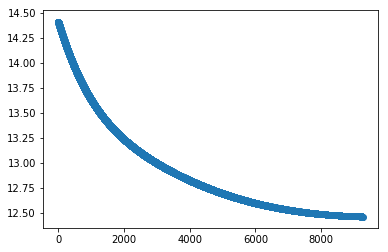

In [13]:
plt.scatter(itera , fc)

## The curve going to decrease as we increase iterations i.e it's a sign of that gradient decent works 